# Fundamentos de Apache Spark: SQL/DataFrames

**Spark SQLtrabaja con DataFrames**. Un DataFrame es una **representación relacional de los datos**. Proporciona funciones con capacidades similares a SQL. Además, permite escribir **consultas tipo SQL** para nuestro análisis de datos.

Los DataFrames son similares a las tablas relacionales o DataFrames en Python / R auqnue con muchas optimizaciones que se ejecutan de manera "oculta" para el usuario. Hay varias formas de crear DataFrames a partir de colecciones, tablas HIVE, tablas relacionales y RDD.

In [8]:
pip install pyspark
pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 8.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 5.3 MB/s eta 0:00:00ta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488492 sha256=a1b13775a6a26e18bed8a69f93866920bee317848276d42d032480eacaa753c2
  Stored in directory: /home/codespace/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [9]:
import findspark

findspark.init()

import pandas as pd
import pyspark

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

### Crear la sesión de Spark 

In [11]:
spark = SparkSession.builder.getOrCreate()

24/07/23 23:50:21 WARN Utils: Your hostname, codespaces-c8e9e2 resolves to a loopback address: 127.0.0.1; using 172.16.5.4 instead (on interface eth0)
24/07/23 23:50:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/23 23:50:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Crear el DataFrame

In [12]:
emp = [(1, "AAA", "dept1", 1000),
    (2, "BBB", "dept1", 1100),
    (3, "CCC", "dept1", 3000),
    (4, "DDD", "dept1", 1500),
    (5, "EEE", "dept2", 8000),
    (6, "FFF", "dept2", 7200),
    (7, "GGG", "dept3", 7100),
    (8, "HHH", "dept3", 3700),
    (9, "III", "dept3", 4500),
    (10, "JJJ", "dept5", 3400)]

dept = [("dept1", "Department - 1"),
        ("dept2", "Department - 2"),
        ("dept3", "Department - 3"),
        ("dept4", "Department - 4")

       ]

df = spark.createDataFrame(emp, ["id", "name", "dept", "salary"])

deptdf = spark.createDataFrame(dept, ["id", "name"]) 

In [13]:
df.show()

24/07/23 23:50:39 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
|  2| BBB|dept1|  1100|
|  3| CCC|dept1|  3000|
|  4| DDD|dept1|  1500|
|  5| EEE|dept2|  8000|
|  6| FFF|dept2|  7200|
|  7| GGG|dept3|  7100|
|  8| HHH|dept3|  3700|
|  9| III|dept3|  4500|
| 10| JJJ|dept5|  3400|
+---+----+-----+------+



In [ ]:
#Crear un df a partir de una tabla de Hive
df = spark.table(“tbl_name”)

# Operaciones básicas en DataFrames

### count
* Cuenta el número de filas

In [14]:
df.count()

10

### columns

In [15]:
df.columns

['id', 'name', 'dept', 'salary']

### dtypes
* Accede al DataType de columnas dentro del DataFrame

In [16]:
df.dtypes

[('id', 'bigint'),
 ('name', 'string'),
 ('dept', 'string'),
 ('salary', 'bigint')]

### schema
* Comprueba cómo Spark almacena el esquema del DataFrame

In [17]:
df.schema

StructType([StructField('id', LongType(), True), StructField('name', StringType(), True), StructField('dept', StringType(), True), StructField('salary', LongType(), True)])

### printSchema

In [18]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- dept: string (nullable = true)
 |-- salary: long (nullable = true)



### select
* Seleccione columnas del DataFrame

In [19]:
df.select("id", "name").show()

+---+----+
| id|name|
+---+----+
|  1| AAA|
|  2| BBB|
|  3| CCC|
|  4| DDD|
|  5| EEE|
|  6| FFF|
|  7| GGG|
|  8| HHH|
|  9| III|
| 10| JJJ|
+---+----+



### filter

* Filtrar las filas según alguna condición.
* Intentemos encontrar las filas con id = 1.
* Hay diferentes formas de especificar la condición.

In [20]:
df.filter(df["id"] == 1).show()
df.filter(df.id == 1).show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+



In [22]:
df.filter(col("id") == 1).show()
df.filter("id = 1").show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+



### drop
* Elimina una columna en particular

In [23]:
newdf = df.drop("id")
newdf.show(2)

+----+-----+------+
|name| dept|salary|
+----+-----+------+
| AAA|dept1|  1000|
| BBB|dept1|  1100|
+----+-----+------+
only showing top 2 rows



### Aggregations
* Podemos usar la función groupBy para agrupar los datos y luego usar la función "agg" para realizar la agregación de datos agrupados.

In [24]:
(df.groupBy("dept")
    .agg(
        count("salary").alias("count"),
        sum("salary").alias("sum"),
        max("salary").alias("max"),
        min("salary").alias("min"),
        avg("salary").alias("avg")
        ).show()
)

+-----+-----+-----+----+----+------+
| dept|count|  sum| max| min|   avg|
+-----+-----+-----+----+----+------+
|dept1|    4| 6600|3000|1000|1650.0|
|dept2|    2|15200|8000|7200|7600.0|
|dept5|    1| 3400|3400|3400|3400.0|
|dept3|    3|15300|7100|3700|5100.0|
+-----+-----+-----+----+----+------+



### Sorting

* Ordena los datos según el "salario". De forma predeterminada, la clasificación se realizará en orden ascendente.

In [25]:
df.sort("salary").show(5)

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
|  2| BBB|dept1|  1100|
|  4| DDD|dept1|  1500|
|  3| CCC|dept1|  3000|
| 10| JJJ|dept5|  3400|
+---+----+-----+------+
only showing top 5 rows



In [26]:
# Sort the data in descending order.
df.sort(desc("salary")).show(5)

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  5| EEE|dept2|  8000|
|  6| FFF|dept2|  7200|
|  7| GGG|dept3|  7100|
|  9| III|dept3|  4500|
|  8| HHH|dept3|  3700|
+---+----+-----+------+
only showing top 5 rows



### Columnas derivadas
* Podemos usar la función "withColumn" para derivar la columna en función de las columnas existentes ...

In [27]:
df.withColumn("bonus", col("salary") * .1).show()

+---+----+-----+------+-----+
| id|name| dept|salary|bonus|
+---+----+-----+------+-----+
|  1| AAA|dept1|  1000|100.0|
|  2| BBB|dept1|  1100|110.0|
|  3| CCC|dept1|  3000|300.0|
|  4| DDD|dept1|  1500|150.0|
|  5| EEE|dept2|  8000|800.0|
|  6| FFF|dept2|  7200|720.0|
|  7| GGG|dept3|  7100|710.0|
|  8| HHH|dept3|  3700|370.0|
|  9| III|dept3|  4500|450.0|
| 10| JJJ|dept5|  3400|340.0|
+---+----+-----+------+-----+



### Joins

* Podemos realizar varios tipos de combinaciones en múltiples DataFrames.

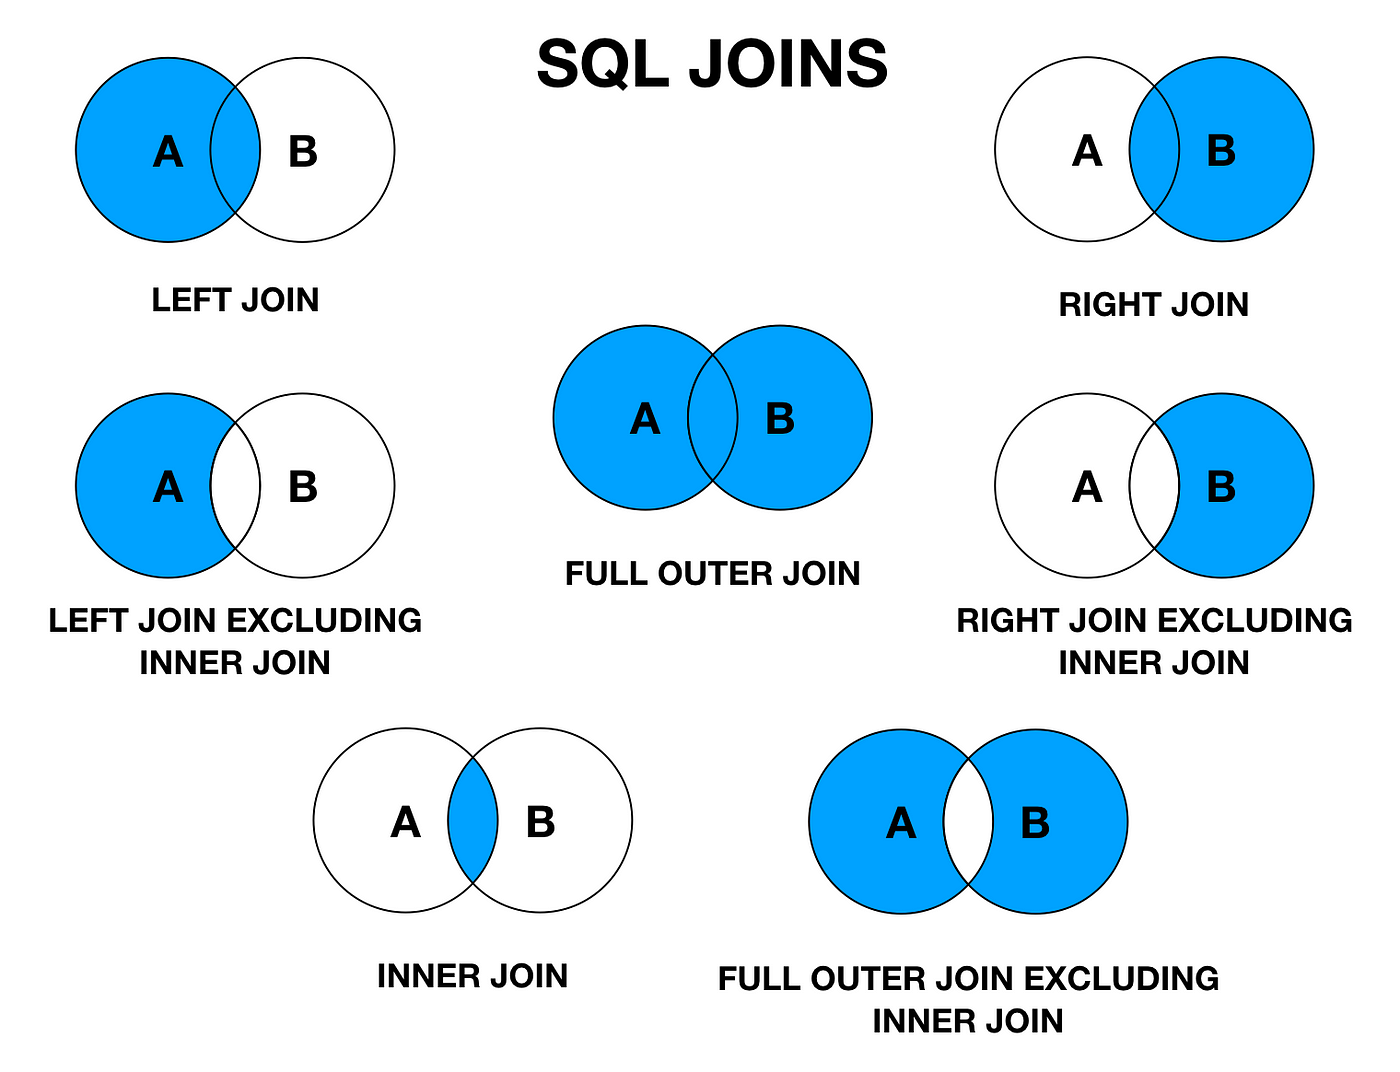
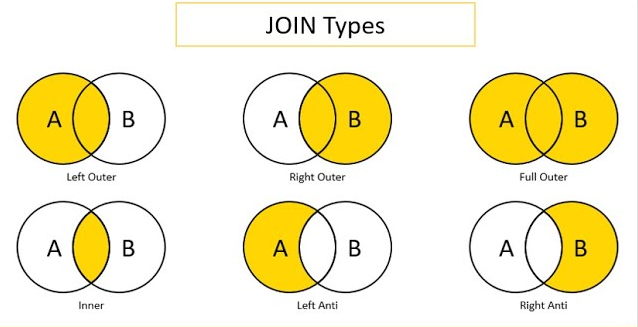

In [28]:
# Inner JOIN.
df.join(deptdf, df["dept"] == deptdf["id"]).show()

+---+----+-----+------+-----+--------------+
| id|name| dept|salary|   id|          name|
+---+----+-----+------+-----+--------------+
|  1| AAA|dept1|  1000|dept1|Department - 1|
|  2| BBB|dept1|  1100|dept1|Department - 1|
|  3| CCC|dept1|  3000|dept1|Department - 1|
|  4| DDD|dept1|  1500|dept1|Department - 1|
|  5| EEE|dept2|  8000|dept2|Department - 2|
|  6| FFF|dept2|  7200|dept2|Department - 2|
|  7| GGG|dept3|  7100|dept3|Department - 3|
|  8| HHH|dept3|  3700|dept3|Department - 3|
|  9| III|dept3|  4500|dept3|Department - 3|
+---+----+-----+------+-----+--------------+



### Left Outer Join

In [29]:
df.join(deptdf, df["dept"] == deptdf["id"], "left_outer").show()

+---+----+-----+------+-----+--------------+
| id|name| dept|salary|   id|          name|
+---+----+-----+------+-----+--------------+
|  1| AAA|dept1|  1000|dept1|Department - 1|
|  2| BBB|dept1|  1100|dept1|Department - 1|
|  3| CCC|dept1|  3000|dept1|Department - 1|
|  4| DDD|dept1|  1500|dept1|Department - 1|
|  5| EEE|dept2|  8000|dept2|Department - 2|
| 10| JJJ|dept5|  3400| NULL|          NULL|
|  7| GGG|dept3|  7100|dept3|Department - 3|
|  8| HHH|dept3|  3700|dept3|Department - 3|
|  9| III|dept3|  4500|dept3|Department - 3|
|  6| FFF|dept2|  7200|dept2|Department - 2|
+---+----+-----+------+-----+--------------+



### Right Outer Join

In [30]:
df.join(deptdf, df["dept"] == deptdf["id"], "right_outer").show()

+----+----+-----+------+-----+--------------+
|  id|name| dept|salary|   id|          name|
+----+----+-----+------+-----+--------------+
|   4| DDD|dept1|  1500|dept1|Department - 1|
|   3| CCC|dept1|  3000|dept1|Department - 1|
|   2| BBB|dept1|  1100|dept1|Department - 1|
|   1| AAA|dept1|  1000|dept1|Department - 1|
|   6| FFF|dept2|  7200|dept2|Department - 2|
|   5| EEE|dept2|  8000|dept2|Department - 2|
|   9| III|dept3|  4500|dept3|Department - 3|
|   8| HHH|dept3|  3700|dept3|Department - 3|
|   7| GGG|dept3|  7100|dept3|Department - 3|
|NULL|NULL| NULL|  NULL|dept4|Department - 4|
+----+----+-----+------+-----+--------------+



### Full Outer Join

In [31]:
df.join(deptdf, df["dept"] == deptdf["id"], "outer").show()

+----+----+-----+------+-----+--------------+
|  id|name| dept|salary|   id|          name|
+----+----+-----+------+-----+--------------+
|   1| AAA|dept1|  1000|dept1|Department - 1|
|   2| BBB|dept1|  1100|dept1|Department - 1|
|   3| CCC|dept1|  3000|dept1|Department - 1|
|   4| DDD|dept1|  1500|dept1|Department - 1|
|   5| EEE|dept2|  8000|dept2|Department - 2|
|   6| FFF|dept2|  7200|dept2|Department - 2|
|   7| GGG|dept3|  7100|dept3|Department - 3|
|   8| HHH|dept3|  3700|dept3|Department - 3|
|   9| III|dept3|  4500|dept3|Department - 3|
|NULL|NULL| NULL|  NULL|dept4|Department - 4|
|  10| JJJ|dept5|  3400| NULL|          NULL|
+----+----+-----+------+-----+--------------+



---

### Consultas SQL
* Ejecución de consultas tipo SQL.
* También podemos realizar análisis de datos escribiendo consultas similares a SQL. Para realizar consultas similares a SQL, necesitamos registrar el DataFrame como una Vista temporal.

In [33]:
# Register DataFrame as Temporary Table
df.createOrReplaceTempView("temp_table")

# Execute SQL-Like query.
spark.sql("select * from temp_table where id = 1").show()

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  1| AAA|dept1|  1000|
+---+----+-----+------+



In [34]:
spark.sql("select distinct id from temp_table").show(10)

+---+
| id|
+---+
|  5|
|  1|
|  3|
|  2|
|  4|
|  7|
|  6|
|  9|
| 10|
|  8|
+---+



In [35]:
spark.sql("select * from temp_table where salary >= 1500").show(10)

+---+----+-----+------+
| id|name| dept|salary|
+---+----+-----+------+
|  3| CCC|dept1|  3000|
|  4| DDD|dept1|  1500|
|  5| EEE|dept2|  8000|
|  6| FFF|dept2|  7200|
|  7| GGG|dept3|  7100|
|  8| HHH|dept3|  3700|
|  9| III|dept3|  4500|
| 10| JJJ|dept5|  3400|
+---+----+-----+------+



### Leyendo la tabla HIVE como DataFrame

In [25]:
# DB_NAME : Name of the the HIVE Database
# TBL_NAME : Name of the HIVE Table


df = spark.table("DB_NAME"."TBL_NAME")

### Guardar DataFrame como tabla HIVE

In [ ]:
df.write.saveAsTable("DB_NAME.TBL_NAME")

## También podemos seleccionar el argumento "modo" con overwrite", "append", "error" etc.
df.write.saveAsTable("DB_NAME.TBL_NAME", mode="overwrite")

# De forma predeterminada, la operación guardará el DataFrame como una tabla interna / administrada de HIVE

### Guardar el DataFrame como una tabla externa HIVE

In [ ]:
df.write.saveAsTable("DB_NAME.TBL_NAME", path=<location_of_external_table>)

### Crea un DataFrame a partir de un archivo CSV
* Podemos crear un DataFrame usando un archivo CSV y podemos especificar varias opciones como un separador, encabezado, esquema, inferSchema y varias otras opciones.

In [ ]:
 df = spark.read.csv("path_to_csv_file", sep="|", header=True, inferSchema=True)

### Guardar un DataFrame como un archivo CSV

In [ ]:
df.write.csv("path_to_CSV_File", sep="|", header=True, mode="overwrite")

### Crea un DataFrame a partir de una tabla relacional
* Podemos leer los datos de bases de datos relacionales usando una URL JDBC.

In [ ]:
# url : a JDBC URL of the form jdbc:subprotocol:subname
# TBL_NAME : Name of the relational table.
# USER_NAME : user name to connect to DataBase.
# PASSWORD: password to connect to DataBase.


relational_df = spark.read.format('jdbc')
                        .options(url=url, dbtable= <TBL_NAME>, user= <USER_NAME>, password = <PASSWORD>)
                        .load()

### Guardar el DataFrame como una tabla relacional
* Podemos guardar el DataFrame como una tabla relacional usando una URL JDBC.

In [ ]:
# url : a JDBC URL of the form jdbc:subprotocol:subname
# TBL_NAME : Name of the relational table.
# USER_NAME : user name to connect to DataBase.
# PASSWORD: password to connect to DataBase.


 relational_df.write.format('jdbc')
                    .options(url=url, dbtable= <TBL_NAME>, user= <USER_NAME>, password = <PASSWORD>)
                    .mode('overwrite')
                    .save()